In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.metrics import RocCurveDisplay, roc_auc_score

from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv("data/heart-disease.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [5]:
(df["target"].value_counts(normalize=True))*100

1    54.455446
0    45.544554
Name: target, dtype: float64

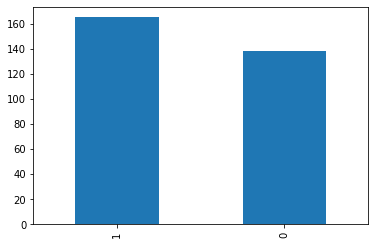

In [6]:
df["target"].value_counts().plot(kind="bar");

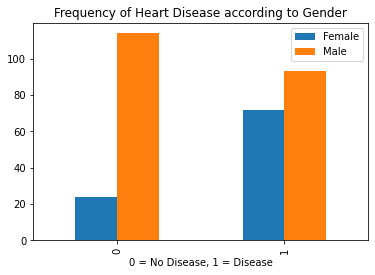

In [7]:
pd.crosstab(df["target"], df["sex"]).plot(kind="bar")
plt.title("Frequency of Heart Disease according to Gender")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.legend(["Female", "Male"]);

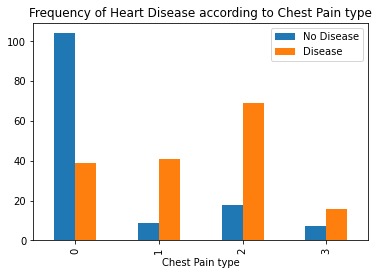

In [8]:
pd.crosstab(df["cp"], df["target"]).plot(kind="bar")
plt.title("Frequency of Heart Disease according to Chest Pain type")
plt.xlabel("Chest Pain type")
plt.legend(["No Disease", "Disease"]);

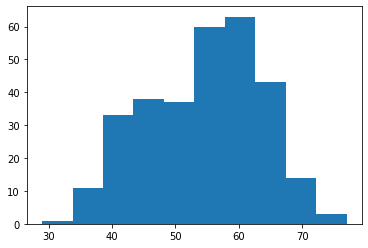

In [9]:
plt.hist(df["age"]);

In [10]:
correlation = df.corr() 
correlation

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


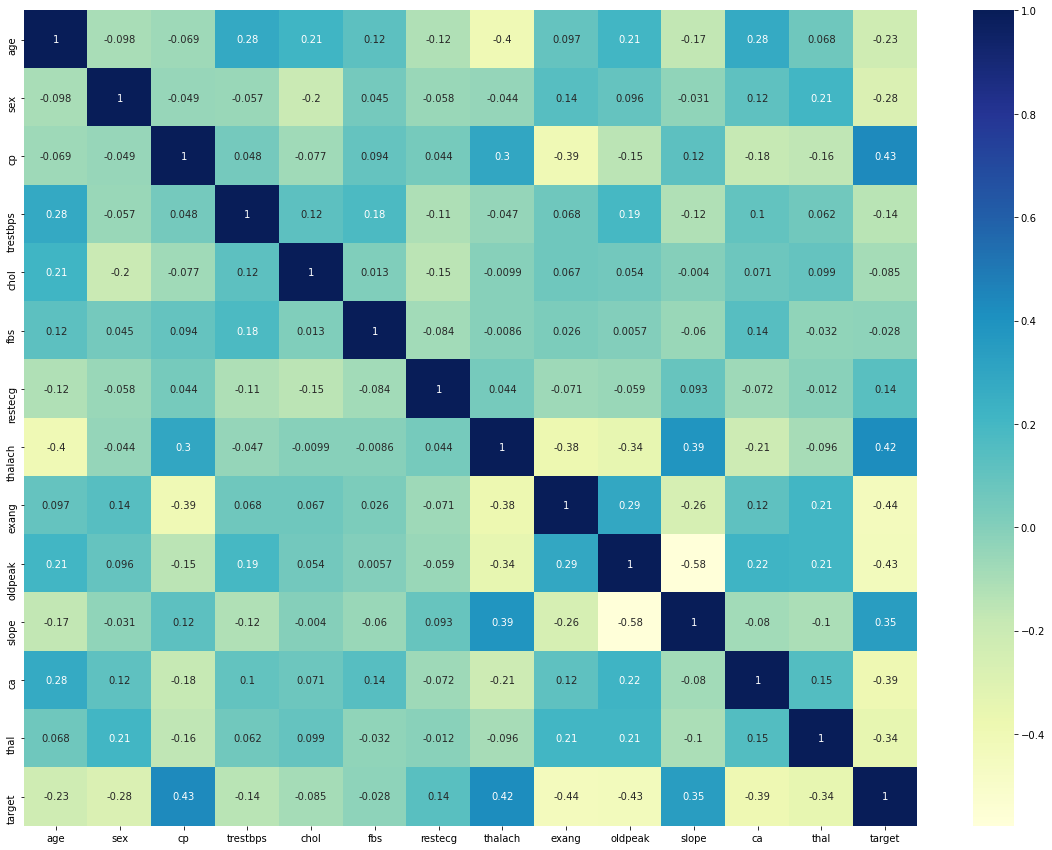

In [11]:
plt.figure(figsize=(20,15))
sns.heatmap(correlation, annot=True, cmap="YlGnBu");

# Models 
- KNeighboursClassifier 
- Logistic Regression 
- Random Forest Classifier

In [12]:
X = df.drop("target", axis=1)
y = df["target"]

np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [14]:
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
pd.DataFrame(data=X_train, columns=X.columns)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.270833,1.0,0.333333,0.265306,0.378753,0.0,0.5,0.649123,0.0,0.000000,1.0,0.00,0.666667
1,0.604167,1.0,0.000000,0.571429,0.321016,0.0,0.0,0.201754,1.0,0.142857,1.0,0.00,1.000000
2,0.354167,1.0,0.666667,0.571429,0.230947,0.0,0.5,0.517544,0.0,0.642857,0.5,0.00,0.666667
3,0.541667,0.0,0.333333,0.418367,0.274827,0.0,0.0,0.640351,0.0,0.250000,0.5,0.00,0.666667
4,0.645833,1.0,0.000000,0.234694,0.228637,1.0,0.5,0.631579,1.0,0.250000,1.0,0.50,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,0.437500,1.0,0.666667,0.469388,0.235566,0.0,0.5,0.657895,0.0,0.107143,0.5,0.25,1.000000
238,0.458333,1.0,0.666667,0.000000,0.221709,0.0,0.5,0.578947,1.0,0.000000,1.0,0.25,1.000000
239,0.833333,1.0,1.000000,0.673469,0.237875,1.0,0.0,0.377193,0.0,0.017857,0.5,0.25,0.666667
240,0.354167,1.0,0.000000,0.265306,0.272517,0.0,0.0,0.491228,0.0,0.142857,1.0,0.00,1.000000


In [16]:
models = {"KNeighbors": KNeighborsClassifier(), 
          "LogisticRegression": LogisticRegression(), 
          "RandomForest": RandomForestClassifier()}

def fit_and_score(models, X_train, X_test, y_train, y_test): 
    np.random.seed(42)
    scores = {} 
    for name, model in models.items(): 
        model.fit(X_train, y_train)
        scores[name] = model.score(X_test, y_test)
    return scores

In [17]:
scores = fit_and_score(models, X_train, X_test, y_train, y_test)
scores

{'KNeighbors': 0.8360655737704918,
 'LogisticRegression': 0.8524590163934426,
 'RandomForest': 0.8360655737704918}

In [18]:
def evaluate(y_test, y_preds): 
    accuracy = round(accuracy_score(y_test, y_preds), 2)
    precision = round(precision_score(y_test, y_preds), 2)
    recall = round(recall_score(y_test, y_preds), 2)
    logloss = round(log_loss(y_test, y_preds), 2)
    
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("Log Loss:", logloss)

# KNeighbours Classifier

In [19]:
train_scores = []
test_scores = []

n_neighbours = range(1, 21)
for i in n_neighbours: 
    KNN = KNeighborsClassifier(n_neighbors=i)
    KNN.fit(X_train, y_train)
    train_scores.append(KNN.score(X_train, y_train))
    test_scores.append(KNN.score(X_test, y_test))

print(train_scores)
print(" ")
print(test_scores)

[1.0, 0.8801652892561983, 0.8842975206611571, 0.859504132231405, 0.8471074380165289, 0.8471074380165289, 0.8636363636363636, 0.8636363636363636, 0.8677685950413223, 0.859504132231405, 0.8305785123966942, 0.8223140495867769, 0.8099173553719008, 0.7975206611570248, 0.8057851239669421, 0.7851239669421488, 0.7933884297520661, 0.7933884297520661, 0.8016528925619835, 0.8016528925619835]
 
[0.8032786885245902, 0.7540983606557377, 0.8524590163934426, 0.7868852459016393, 0.8360655737704918, 0.819672131147541, 0.819672131147541, 0.8032786885245902, 0.819672131147541, 0.819672131147541, 0.8360655737704918, 0.8360655737704918, 0.819672131147541, 0.8360655737704918, 0.8360655737704918, 0.8032786885245902, 0.8360655737704918, 0.8360655737704918, 0.819672131147541, 0.8524590163934426]


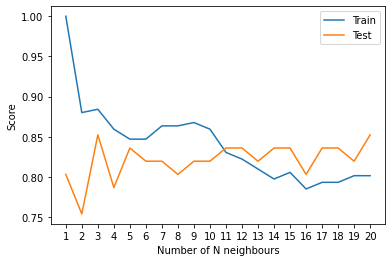

In [20]:
plt.plot(n_neighbours, train_scores, label="Train")
plt.plot(n_neighbours, test_scores, label="Test")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of N neighbours")
plt.ylabel("Score")
plt.legend();

In [21]:
KNN_grid = {"n_neighbors": np.arange(1, 21), 
            "weights": ["uniform", "distance"], 
            "algorithm": ["auto", "ball_tree", "brute"],
            "p": [1, 2]}

np.random.seed(42)

KNN_rs = RandomizedSearchCV(KNeighborsClassifier(), KNN_grid, cv=5, n_iter=30)

KNN_rs.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=30,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'brute'],
                                        'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]),
                                        'p': [1, 2],
                                        'weights': ['uniform', 'distance']})

In [22]:
KNN_rs.best_params_

{'weights': 'uniform', 'p': 1, 'n_neighbors': 5, 'algorithm': 'brute'}

In [23]:
KNN_rs_preds = KNN_rs.predict(X_test)

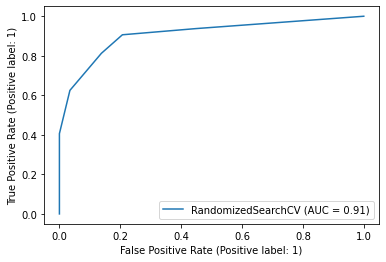

In [24]:
RocCurveDisplay.from_estimator(KNN_rs, X_test, y_test);

In [25]:
print(confusion_matrix(y_test, KNN_rs_preds))

[[25  4]
 [ 6 26]]


In [26]:
print(classification_report(y_test, KNN_rs_preds))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83        29
           1       0.87      0.81      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



# Logistic Regression 

In [27]:
log_reg_grid = {"C": np.logspace(-2, 2, 20), 
                "solver": ["liblinear"], 
                "penalty": ["l1", "l2"]}

log_reg_rs = RandomizedSearchCV(LogisticRegression(), log_reg_grid, cv=5, n_iter=30)

log_reg_rs.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=30,
                   param_distributions={'C': array([1.00000000e-02, 1.62377674e-02, 2.63665090e-02, 4.28133240e-02,
       6.95192796e-02, 1.12883789e-01, 1.83298071e-01, 2.97635144e-01,
       4.83293024e-01, 7.84759970e-01, 1.27427499e+00, 2.06913808e+00,
       3.35981829e+00, 5.45559478e+00, 8.85866790e+00, 1.43844989e+01,
       2.33572147e+01, 3.79269019e+01, 6.15848211e+01, 1.00000000e+02]),
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['liblinear']})

In [28]:
log_reg_rs.best_params_

{'solver': 'liblinear', 'penalty': 'l2', 'C': 23.357214690901213}

In [29]:
log_reg_rs_preds = log_reg_rs.predict(X_test)

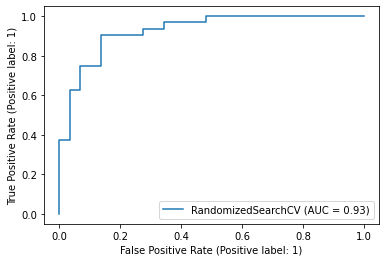

In [30]:
RocCurveDisplay.from_estimator(log_reg_rs, X_test, y_test);

In [31]:
print(confusion_matrix(y_test, log_reg_rs_preds))

[[25  4]
 [ 5 27]]


In [32]:
print(classification_report(y_test, log_reg_rs_preds))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [33]:
log_reg_best = LogisticRegression(solver="liblinear", penalty="l2", C=23.357214690901213)
log_reg_best.fit(X_train, y_train)

LogisticRegression(C=23.357214690901213, solver='liblinear')

In [34]:
log_reg_best.coef_

array([[-0.38128643, -1.71531377,  2.48676557, -1.58397163, -1.37757724,
         0.29227487,  1.12367996,  2.08529725, -1.13955896, -3.36847146,
         1.55179954, -3.25937008, -2.77486071]])

In [35]:
log_reg_features = dict(zip(df.columns, list(log_reg_best.coef_[0])))
log_reg_features

{'age': -0.3812864322819804,
 'sex': -1.7153137705095303,
 'cp': 2.486765572724849,
 'trestbps': -1.5839716335994622,
 'chol': -1.3775772431221887,
 'fbs': 0.29227487083641124,
 'restecg': 1.1236799641422262,
 'thalach': 2.0852972529295433,
 'exang': -1.1395589587128752,
 'oldpeak': -3.3684714572203234,
 'slope': 1.5517995387024872,
 'ca': -3.259370075315644,
 'thal': -2.774860705758107}

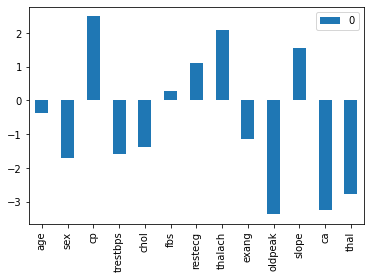

In [37]:
log_reg_features_graph = pd.DataFrame(log_reg_features, index=[0])
log_reg_features_graph.T.plot(kind="bar");

In [38]:
log_reg_features_graph

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,-0.381286,-1.715314,2.486766,-1.583972,-1.377577,0.292275,1.12368,2.085297,-1.139559,-3.368471,1.5518,-3.25937,-2.774861


# Random Forest Classifier

In [39]:
rand_for_grid = {"n_estimators": np.arange(10, 1000, 50), 
                 "max_depth": [None, 3, 5, 10],
                 "min_samples_split": np.arange(2, 20, 2), 
                 "min_samples_leaf": np.arange(1, 20, 2)}

rand_for_rs = RandomizedSearchCV(RandomForestClassifier(), rand_for_grid, cv=5, n_iter=30)

rand_for_rs.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=30,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])})

In [40]:
rand_for_rs.best_params_

{'n_estimators': 10,
 'min_samples_split': 16,
 'min_samples_leaf': 9,
 'max_depth': 3}

In [41]:
rand_for_rs_preds = rand_for_rs.predict(X_test)

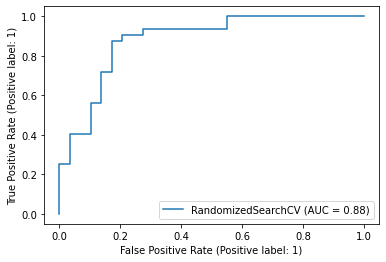

In [42]:
RocCurveDisplay.from_estimator(rand_for_rs, X_test, y_test);

In [43]:
print(confusion_matrix(y_test, rand_for_rs_preds))

[[24  5]
 [ 5 27]]


In [44]:
print(classification_report(y_test, rand_for_rs_preds))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



In [45]:
rand_for_best = RandomForestClassifier(n_estimators= 760,
 min_samples_split= 10,
 min_samples_leaf= 19,
 max_depth = None)

In [46]:
rand_for_best.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=19, min_samples_split=10,
                       n_estimators=760)

In [47]:
rand_for_best.feature_importances_

array([5.17772350e-02, 3.21356815e-02, 1.69721667e-01, 1.12580185e-02,
       1.63964179e-02, 8.14151032e-05, 4.86195471e-03, 9.20900877e-02,
       1.14388986e-01, 1.22208875e-01, 7.34604424e-02, 1.80493172e-01,
       1.31126048e-01])

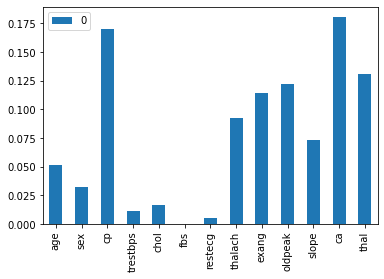

In [48]:
rand_for_features_graph = pd.DataFrame(rand_for_best.feature_importances_, X.columns)
rand_for_features_graph.plot(kind="bar");